# Connectivity at reduced resolution

In this example we consider Connectome Utilities ability to load connectivity at reduced resolution.
That is, instead of full-resolution connectivity at the neuron-to-neuron level, we look at connectivity between groups of neurons. Specifically, this approach counts the number of connections between each group of neurons and assigns it a a property or weight to the edge between them.

For example, groups could be generated by spatial binning, which would then result in connectivity at reduced spatial scale. But one can also group based on other properties.

There are two ways of doing this: Directly loading the reduced resolution matrix, or first loading full resolution, then creating a reduced version of it. For really large networks the first approach performs better. 

In this example we show the first approach. It requires you to have access to our exemplary Sonata circuit model.

We begin by loading a circuit

In [1]:
import pandas
import numpy
import bluepysnap as snap

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Set the path below to the SONATA "circuit_config.json"
# contained in the archive of our SSCx model, downloadable from https://zenodo.org/record/7930276
circ_fn = "path/to/circuit_config.json"
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

circ = snap.Circuit(circ_fn)


New we load basic information about neurons into a DataFrame.
To that end, we first write a "loader_config". It specifies the following:
 - Which neurons to load and which of their properties
 - Which filter to apply. In this example, we focus on layer 4 connectivity only
 - How to group the neurons into different classes. Here, we group the neurons together into 50 um "columns", i.e. according to a hexagonal grid
 
 Feel free to adjust any of the specifics, for example using smaller columns

In [2]:
# install the following repo from: bbpgitlab.epfl.ch:conn/structural/Connectome-utilities.git
# Note: There is more documentation in that repo!
from conntility.circuit_models import neuron_groups

loader_config = {
    "loading": {
        "base_target": "Mosaic", 
        "node_population": "S1nonbarrel_neurons",
        "properties": ["x", "y", "z", "etype", "mtype", "layer", "synapse_class"],
        "atlas": [
            {
                "data": "./data/ss_fm.nrrd", 
                "properties": ["ss_flat_x", "depth", "ss_flat_y"]
            }
        ]
    },
    "filtering":[
        {
            "column": "layer",
            "value": 4
        }
    ],
    "grouping": [
        {
            "method": "group_by_grid",
            "columns": ["ss_flat_x", "ss_flat_y"],
            "args": [50.0],
            "kwargs":{
                "prefix": "hex50-"                
            }
        }
    ]
}


base_grp = neuron_groups.load_group_filter(circ, loader_config)
base_grp = base_grp.loc[base_grp["hex50-x"] > -1E6]

display(base_grp)

node_ids   etype  layer   mtype synapse_class            x   
hex50-i hex50-j                                                               
-45     75         108727   dSTUT      4   L4_BP           INH  3918.383222  \
-40     77         108728     bAC      4   L4_BP           INH  4140.810336   
-37     65         108729    cNAC      4   L4_BP           INH  3953.899058   
-31     65         108730  cACint      4   L4_BP           INH  4214.386218   
        65         108731  cACint      4   L4_BP           INH  4184.420803   
...                   ...     ...    ...     ...           ...          ...   
-20     61         142985    dNAC      4  L4_LBC           INH  4578.633455   
-38     58         142986    dNAC      4  L4_LBC           INH  3718.031043   
-26     52         142987  cACint      4  L4_LBC           INH  4165.300450   
-21     63         142988    dNAC      4  L4_LBC           INH  4483.681945   
-39     69         142989    dNAC      4  L4_LBC           INH  3967.728001   

                           y            z    ss_flat_x       depth   
hex50-i hex50-j                                                      
-45     75       -882.079924 -1946.094942  1312.222916  628.627339  \
-40     77       -766.305463 -2090.662966  1634.738253  707.878802   
-37     65      -1279.341226 -2143.970161  1208.205830  702.437331   
-31     65      -1362.666051 -2201.251811  1434.979465  668.583065   
        65      -1328.656268 -2366.952165  1487.859349  753.056980   
...                      ...          ...          ...         ...   
-20     61      -1544.271291 -2647.569122  1774.841586  702.547689   
-38     58      -1589.684869 -2003.947179   869.384081  808.446289   
-26     52      -1842.075237 -2277.392529  1149.264142  784.271024   
-21     63      -1379.607185 -2689.523346  1828.617089  809.701962   
-39     69      -1128.846627 -2056.902446  1325.461833  670.273358   

                   ss_flat_y      hex50-x  hex50-y hex50-subtarget  
hex50-i hex50-j                                                     
-45     75       2990.311860  1299.038106   3000.0         R40;C15  
-40     77       2933.097781  1602.146997   2925.0         R39;C18  
-37     65       2590.083588  1212.435565   2550.0         R34;C14  
-31     65       2388.153284  1472.243186   2400.0         R32;C17  
        65       2381.291725  1472.243186   2400.0         R32;C17  
...                      ...          ...      ...             ...  
-20     61       1989.045137  1775.352078   2025.0         R27;C20  
-38     58       2406.710118   866.025404   2400.0         R32;C10  
-26     52       1973.482706  1125.833025   1950.0         R26;C13  
-21     63       2110.120021  1818.653348   2100.0         R28;C21  
-39     69       2707.025922  1299.038106   2700.0         R36;C15  

[34263 rows x 14 columns]

Quick check: How many neurons of each type are we considering?

As expected: Only layer 4 neurons, but all of them.

In [3]:
base_grp["mtype"].value_counts()

mtype
L4_TPC       20563
L4_UPC        8554
L4_SSC        2916
L4_LBC         682
L4_MC          521
L4_NBC         422
L4_BTC         252
L4_BP          102
L4_SBC         101
L4_DBC          78
L4_NGC          61
L4_CHC          11
L5_TPC:B         0
L5_SBC           0
L5_NGC           0
L5_NBC           0
L5_TPC:A         0
L5_TPC:C         0
L5_LBC           0
L6_LBC           0
L6_TPC:C         0
L6_TPC:A         0
L6_SBC           0
L6_NGC           0
L6_NBC           0
L6_MC            0
L6_IPC           0
L5_UPC           0
L6_HPC           0
L6_DBC           0
L6_CHC           0
L6_BTC           0
L6_BPC           0
L6_BP            0
L5_MC            0
L1_DAC           0
L5_DBC           0
L5_CHC           0
L1_LAC           0
L1_NGC-DA        0
L1_NGC-SA        0
L1_SAC           0
L23_BP           0
L23_BTC          0
L23_CHC          0
L23_DBC          0
L23_LBC          0
L23_MC           0
L23_NBC          0
L23_NGC          0
L23_SBC          0
L2_IPC           0
L2_TPC

We use the following to load the matrix of connections _between_ the defined groups.
(Note: There are different functions available for loading connections within groups).

Here, we load the midrange connection count. Use instead "local" for location connectivity.

In [4]:
from conntility import circuit_models

M = circuit_models.circuit_matrix_between_groups(circ, base_grp, connectome="midrange__S1nonbarrel_neurons__chemical",
                                                 population="midrange__S1nonbarrel_neurons__chemical", extract_full=True)
#M.index = pandas.MultiIndex.from_frame(M.index.to_frame().applymap(int))

Counting...: 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


The result is a pandas.Series with connection counts between groups. Indexed by the name of the source / target groups.

Note that for this purpose the names of the source / target groups are slightly altered. In "base_grp" above the groups are given by a "i" and a "j" index. The i and j are condensed into a single string, separated by an underscore.

In [5]:
display(M)

Source node  Target node
-24_57       -42_60         1422.0
-25_56       -39_57         1326.0
             -42_60         1113.0
-26_58       -42_60         1104.0
-25_59       -42_60          918.0
                             ...  
-22_59       -41_64            1.0
-39_57       -24_54            1.0
             -23_61            1.0
             -23_58            1.0
-20_55       -40_59            1.0
Length: 748, dtype: float64

We do some re-indexing to turn the output into a ConnectivityMatrix.

First, the current indices of source and target nodes cover a wide range of intege values. We convert them to cover intergers from 0 to N-1 instead. The result is put into a DataFrame with columns "row", and "col".

Next, we calculate locations associated with the populations of the nodes. To that end, we simply average the locations of neurons contained in each node.

In [6]:
from conntility import ConnectivityMatrix

srt_idx = sorted(numpy.unique(M.index.to_frame().values))
con_idx = M.index.to_frame().applymap(lambda _x: srt_idx.index(_x)).reset_index(drop=True)
con_idx = con_idx.rename(columns={"Source node": "row", "Target node": "col"})

hex_locations = base_grp.groupby(base_grp.index.names)[["hex50-x", "hex50-y"]].agg("mean")
idxx = hex_locations.index.to_frame().apply(lambda row: "{0}_{1}".format(*row.values), axis=1)
hex_locations.index = idxx

v_props = hex_locations.loc[srt_idx]

C = ConnectivityMatrix(con_idx, vertex_properties=v_props,
                       edge_properties=M.reset_index(drop=True), # edge weights
                       shape=(len(srt_idx), len(srt_idx)))

We can plot the connectivity matrix

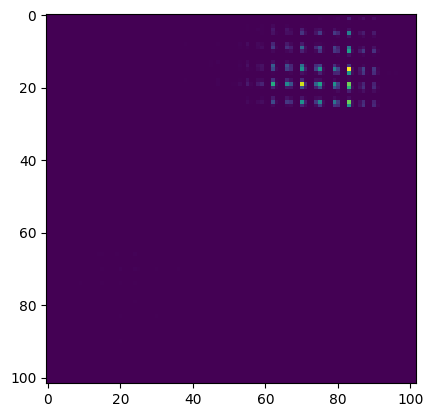

In [7]:
from matplotlib import pyplot as plt

plt.imshow(C.array, interpolation="nearest")

Now we can plot for example the strengths of connections from an exemplary location
NOTE: This is long-range connectivity only, so we do not expect it to peak around the source location

Text(0, 0.5, 'um')

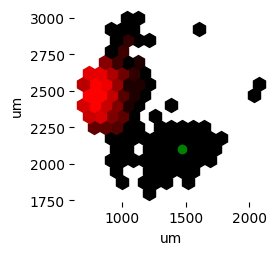

In [8]:
plot_divider = 2.5
example_idx = 20
exemplary_loc = C.vertices.iloc[example_idx]

ax = plt.figure(figsize=(2.5, 2.5)).gca()

for i, value in enumerate(C.array[example_idx, :]):
    col = [numpy.minimum(numpy.log10(value + 1) / plot_divider, 1), 0, 0]
    loc = C.vertices.iloc[i]
    ax.plot(loc["hex50-x"], loc["hex50-y"], color=col, ms=10, marker="h")

ax.plot(exemplary_loc["hex50-x"], exemplary_loc["hex50-y"], marker='o', color="green")
ax.set_frame_on(False)
ax.set_xlabel("um"); ax.set_ylabel("um")

Neat! Even cooler: Both outgoing and incoming connectivity.
We encode outgoing strength in the "red" channel, incoming in the "blue" channel.

Text(0, 0.5, 'um')

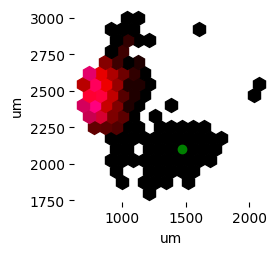

In [9]:
plot_divider = 2.5
example_idx = 20
exemplary_loc = C.vertices.iloc[example_idx]

ax = plt.figure(figsize=(2.5, 2.5)).gca()

for i in range(len(C)):
    value_row = C.array[example_idx, i]
    value_col = C.array[i, example_idx]
    col = [numpy.minimum(numpy.log10(value_row + 1) / plot_divider, 1), 0, 
           numpy.minimum(numpy.log10(value_col + 1) / plot_divider, 1)]
    loc = C.vertices.iloc[i]
    ax.plot(loc["hex50-x"], loc["hex50-y"], color=col, ms=10, marker="h")

ax.plot(exemplary_loc["hex50-x"], exemplary_loc["hex50-y"], marker='o', color="green")
ax.set_frame_on(False)
ax.set_xlabel("um"); ax.set_ylabel("um")

Another example: Total incoming strength.

Note: Not using logarithmic color scale, unlike above

Text(0, 0.5, 'um')

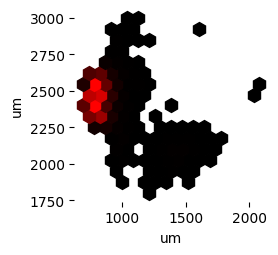

In [10]:
plot_divider = 5E3

ax = plt.figure(figsize=(2.5, 2.5)).gca()

for i, value in enumerate(C.array.sum(axis=0)):
    col = [numpy.minimum(value / plot_divider, 1), 0, 0]
    loc = C.vertices.iloc[i]
    ax.plot(loc["hex50-x"], loc["hex50-y"], color=col, ms=10, marker="h")

ax.set_frame_on(False)
ax.set_xlabel("um"); ax.set_ylabel("um")


We can also first load the connectivity at full resolution, then use the .condense method to reduce the spatial resolution to something equivalent to the example above.

However, as we will see this is slower and has other disadvantages.

First, we load the full resolution matrix.

In [11]:
M = circuit_models.circuit_connection_matrix(circ, connectome="midrange__S1nonbarrel_neurons__chemical",
                                             for_gids=base_grp["node_ids"].values,
                                             population="midrange__S1nonbarrel_neurons__chemical")
C2 = ConnectivityMatrix(M, vertex_properties=base_grp.reset_index())
print(C2.vertices)

100%|██████████| 34263/34263 [00:46<00:00, 731.08it/s] 

       index  hex50-i  hex50-j  node_ids   etype  layer   mtype synapse_class   
0          0      -45       75    108727   dSTUT      4   L4_BP           INH  \
1          1      -40       77    108728     bAC      4   L4_BP           INH   
2          2      -37       65    108729    cNAC      4   L4_BP           INH   
3          3      -31       65    108730  cACint      4   L4_BP           INH   
4          4      -31       65    108731  cACint      4   L4_BP           INH   
...      ...      ...      ...       ...     ...    ...     ...           ...   
34258  34258      -20       61    142985    dNAC      4  L4_LBC           INH   
34259  34259      -38       58    142986    dNAC      4  L4_LBC           INH   
34260  34260      -26       52    142987  cACint      4  L4_LBC           INH   
34261  34261      -21       63    142988    dNAC      4  L4_LBC           INH   
34262  34262      -39       69    142989    dNAC      4  L4_LBC           INH   

                 x         

Then we use .condense to calculate the reduced resolution (i.e. quotient) matrix with respect to our previous grouping.

As we see, we lose most of the information about the nodes. We still get a reference that we can use to look up node properties in the original ConnectivityMatrix.

Note: In the future this behavior will improve to preserve node properties where possible.

In [12]:
C_condensed = C2.condense("hex50-subtarget")

print(C_condensed.vertices)

     index                                  _idxx_in_original
0        0  [5437, 6867, 13598, 15179, 15211, 17528, 19588...
1        1  [1707, 2761, 5628, 5935, 5997, 7445, 8719, 104...
2        2  [3192, 6170, 9316, 9510, 14173, 20967, 24239, ...
3        3  [1577, 3407, 4944, 6171, 6399, 6440, 8233, 127...
4        4                                     [22551, 32518]
..     ...                                                ...
236    236  [7487, 8443, 13650, 15458, 16200, 21799, 25646...
237    237                         [1864, 9627, 29418, 30497]
238    238                                      [3616, 11702]
239    239                  [6384, 8425, 15773, 21333, 28053]
240    240                  [7069, 8155, 14947, 25081, 31343]

[241 rows x 2 columns]


We can still plot the connectivity matrix though.

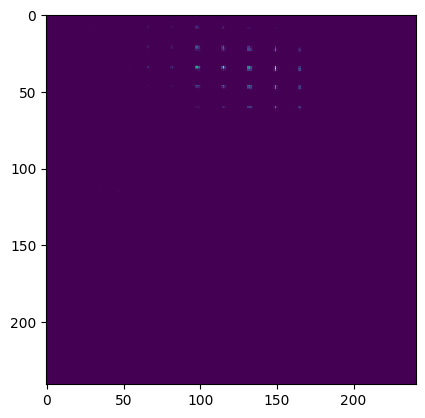

In [13]:
plt.imshow(C2.condense("hex50-subtarget").array, interpolation="nearest")